# Poject Name-Student Performance in Exam

### Imported Standard Lybraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loaded the dataset

In [2]:
data=pd.read_csv('data.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### shape of dataset

In [4]:
data.shape

(1000, 8)

### Columns and datatypes

In [7]:
print(list(data.columns))

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [9]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Data Information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Statistical Description of dataset

In [12]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Drop duplicate values

In [15]:
dup_data=data.drop_duplicates()
dup_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [17]:
dup_data.shape

(1000, 8)

### Plotting Heatmap

<AxesSubplot:title={'center':'Heatmap of contineous features'}>

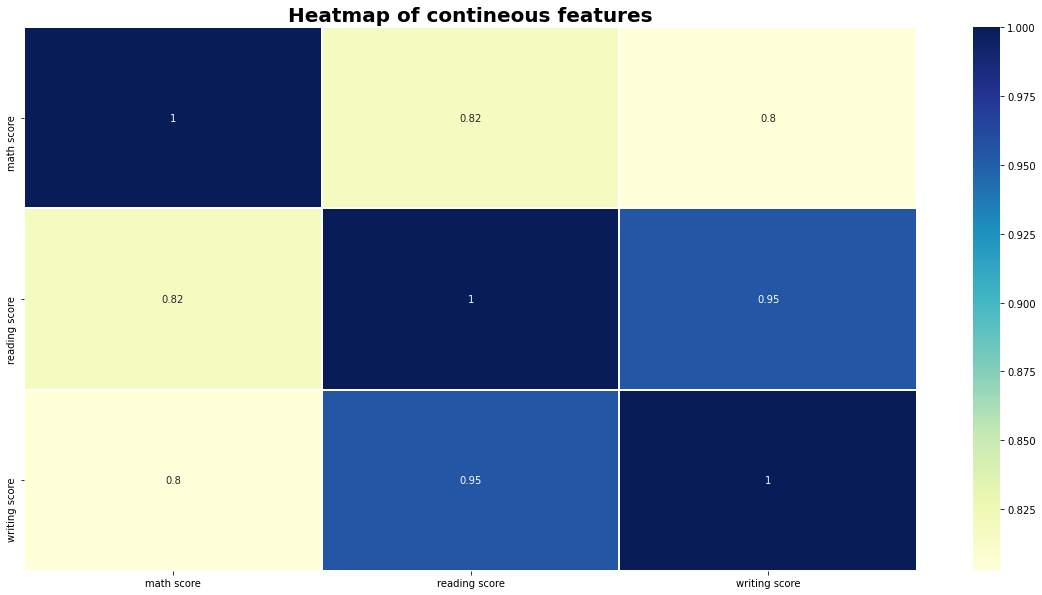

In [19]:
plt.figure(figsize=(20,10))
plt.title('Heatmap of contineous features',fontweight='bold',fontsize=20)
sns.heatmap(dup_data.corr(),annot=True,cmap='YlGnBu',linewidth=1)

In [20]:
print(data['math score'].median(),data['writing score'].median(),data['reading score'].median())

66.0 69.0 70.0


### Adding subject scores to overall_score

In [22]:
data['overall_score']=data['math score']+data['reading score']+data['writing score']
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


### Correlation between Writing score and math score w.r.t gender

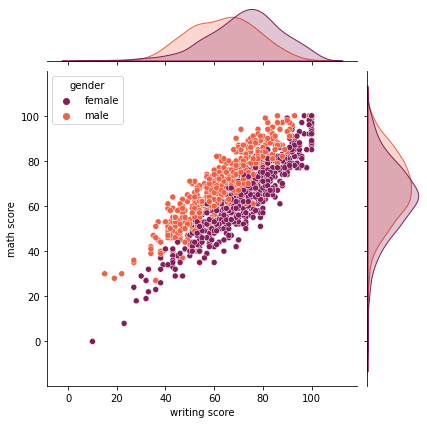

In [23]:
sns.jointplot(x='writing score',y='math score',data=data,hue='gender',palette='rocket')

### Correlation between Writting score and math score w.r.t lunch

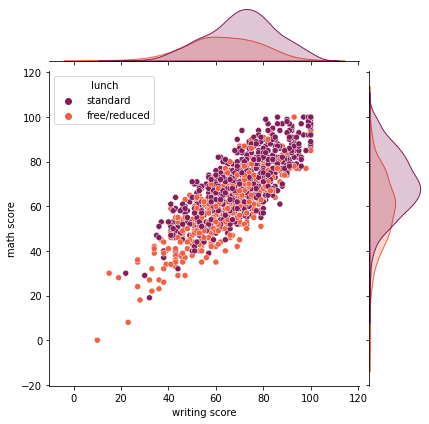

In [25]:
sns.jointplot(x='writing score',y='math score',data=data,palette='rocket',hue='lunch')

### Correlation between reading score and writting score w.r.t gender

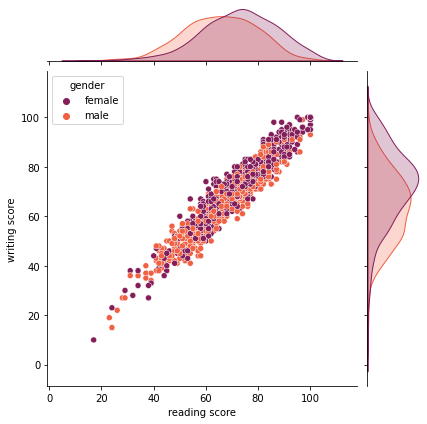

In [26]:
sns.jointplot(x='reading score',y='writing score',data=data,hue='gender',palette='rocket')

### Correlation between reading score and writing score w.r.t lunch

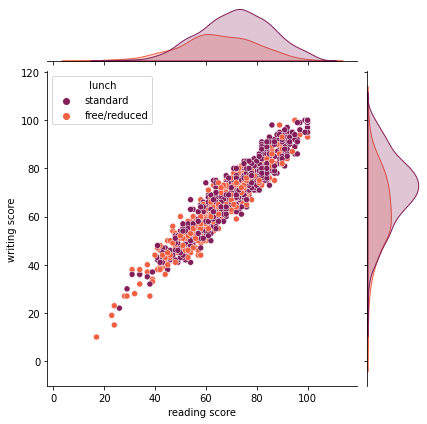

In [28]:
sns.jointplot(x='reading score',y='writing score',data=data,hue='lunch',palette='rocket')

# Future Engineering

### Dropping irrelevent columns

In [30]:
df=data.drop(['writing score','reading score','math score'],axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall_score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


### Converting object categorical feature to numerical feature

In [42]:
df['gender']=data['gender'].map({'female':0,'male':1}).astype(int)
df['lunch']=data['lunch'].map({'standard':0,'free/reduced':1}).astype(int)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall_score
0,0,group B,bachelor's degree,0,0,218
1,0,group C,some college,0,1,247
2,0,group B,master's degree,0,0,278
3,1,group A,associate's degree,1,0,148
4,1,group C,some college,0,0,229
...,...,...,...,...,...,...
995,0,group E,master's degree,0,1,282
996,1,group C,high school,1,0,172
997,0,group C,high school,1,1,195
998,0,group D,some college,0,1,223


In [43]:
df['test preparation course']=data['test preparation course'].map({'none':0,'completed':1}).astype(int)

In [44]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall_score
0,0,group B,bachelor's degree,0,0,218
1,0,group C,some college,0,1,247
2,0,group B,master's degree,0,0,278
3,1,group A,associate's degree,1,0,148
4,1,group C,some college,0,0,229
...,...,...,...,...,...,...
995,0,group E,master's degree,0,1,282
996,1,group C,high school,1,0,172
997,0,group C,high school,1,1,195
998,0,group D,some college,0,1,223


In [52]:
df=pd.get_dummies(data)
df

,math score,reading score,writing score,overall_score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,218,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,69,90,88,247,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,90,95,93,278,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,47,57,44,148,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,76,78,75,229,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,282,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
996,62,55,55,172,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
997,59,71,65,195,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
998,68,78,77,223,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0


### Seperating Independent and Dependent Featue

In [53]:
X=df.drop('overall_score',axis=1)
y=df['overall_score']


In [54]:
X.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


## Import sklearn lybraries for building ML Model

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [62]:
 # Model
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
y_pred=model.predict(X_test)

## Evaluation and Feature Importance

In [64]:
print('RMSE',mean_squared_error(y_test,y_pred,squared=False))

RMSE 3.3197139183971864


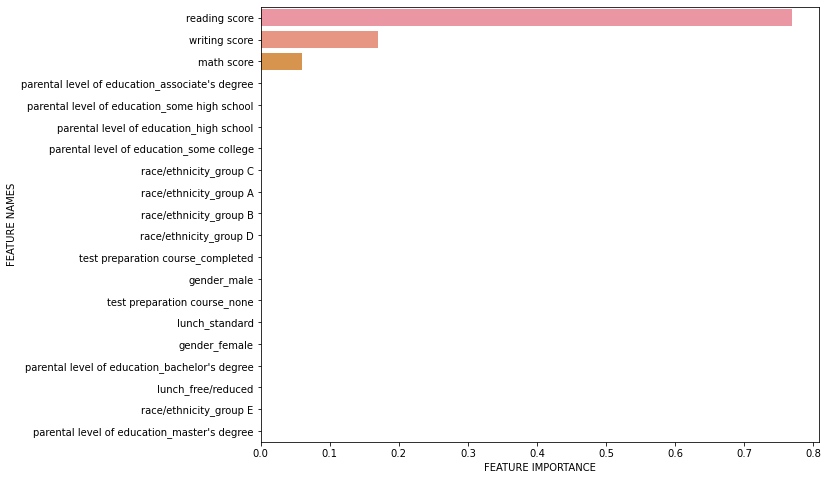

In [72]:
feature_importance=np.array(model.feature_importances_)
feature_names=np.array(X_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt=pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'],ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'],y=df_plt['feature_names'])
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()